### South African Language Identification

## Table of Content

1. Introduction
2. Problem Statement
3. Loading Packages
4. Loading the Data
5. Exploratory Data Analysis (EDA)
6. Data Engineering
7. Modelling
8. Model Explanation
9. Conclusion

## 1. Introduction

South Africa is a vibrant and multicultural society with a rich linguistic tapestry. Its diverse population,
encompassing various languages, underscores the importance of language as a vital tool for enhancing democracy and
enriching the social, cultural, intellectual, economic, and political fabric of the nation. In light of this linguistic
diversity, it becomes imperative for our systems and devices to support communication in multiple languages, reflecting the 
inclusive nature of South African society.

In [ ]:

## 2. Problem Statement

In this task, the objective is to employ Natural Language Processing (NLP) for Language Identification in South Africa's 11 Official languages. The goal is to accurately determine the language of a given text, showcasing the application of NLP techniques in discerning the natural language in which a piece of text is written.

## 3 Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.sparse import hstack
%matplotlib inline
import seaborn as sns
import re
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

sns.set()
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
from nltk.corpus import stopwords

In [ ]:
pip install wordcloud

## 4. Loading the Data

In [ ]:
#Load the test and train data
df_train = pd.read_csv(r"C:\Users\Zinhle\Downloads\south-african-language-identification-hack-2023\train_set.csv")
df_test = pd.read_csv(r"C:\Users\Zinhle\Downloads\south-african-language-identification-hack-2023\test_set.csv")

df_train.head()

In [ ]:
#Printing the test dataset
df_test

## 5. Exploratory Data Analysis (EDA)

### 5.1 Reading the train dataset

In [ ]:
#Looking at the train data
df_train = pd.read_csv(r"C:\Users\Zinhle\Downloads\south-african-language-identification-hack-2023\train_set.csv")
df_train.head()

### 5.2 Analysing the Data


In [ ]:
# Looking at the shape of the train dataset.

df_train.shape

In [ ]:
# looking at the shape of the test data

df_test.shape

In [ ]:
#checks what information does the train datasets holds
df_train.info()

In [ ]:
#checks what information does the test datasets holds
df_test.info()

In [ ]:
#checks columns available in the train data set
df_train.columns

In [ ]:
#checks columns available in the test data set
df_test.columns

In [ ]:
#checking for nulls in the train data.
df_train.isnull().sum()

In [ ]:
#checking for nulls in the test data.
df_test.isnull().sum()

In [ ]:
#checks the last 5 rows of the train  dataset given.
df_train.tail()

In [ ]:
#checks the last 5 rows of the test dataset provided.
df_test.tail()

In [ ]:
#Checking for duplicates in the train dataset.
df_train.nunique()

In [ ]:
#Checking for duplicates in the test dataset.
df_test.nunique()

In [ ]:
#Statistics summary of all train data
df_train.describe(include='all').T

In [ ]:
#Summary of all test data
df_test.describe(include='all').T

In [ ]:
#This piece of code counts the value to understand the distribution of categories for train data.
df_train.value_counts()

In [ ]:
#This piece of code counts the value to understand the distribution of categories for the test data.
df_test.value_counts()

## 6. Data Engineering

In [ ]:
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)


In [38]:
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [39]:
df_train

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,NaN
2,eng,the province of kwazulu-natal department of tr...,NaN
3,nso,o netefatša gore o ba file dilo ka moka tše le...,NaN
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,NaN
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,NaN
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,NaN
32997,eng,closing date for the submission of completed t...,NaN
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,NaN


In [42]:
df_train.lang_id.describe()

count     33000
unique       11
top         xho
freq       3000
Name: lang_id, dtype: object

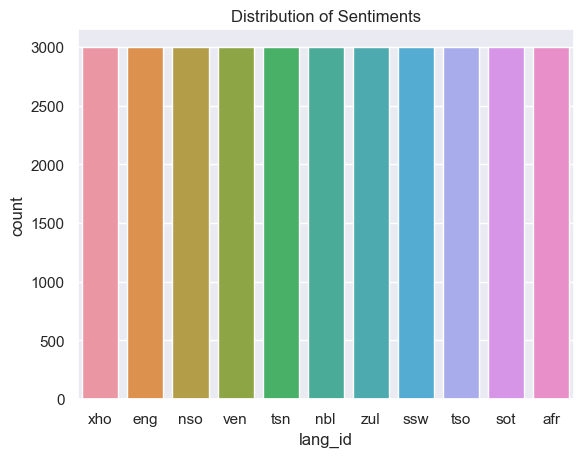

In [56]:
# The distribution of classes in 'sentiment' 1(reference class) has the highest distribution

sns.countplot(x='lang_id', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

In [79]:
# Analyze the characteristics of the tweet text
df_train['index'] = df_train['text'].apply(len)

C:\Users\Zinhle\AppData\Local\Temp\ipykernel_36324\1675813566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['index'] = df_train['text'].apply(len)


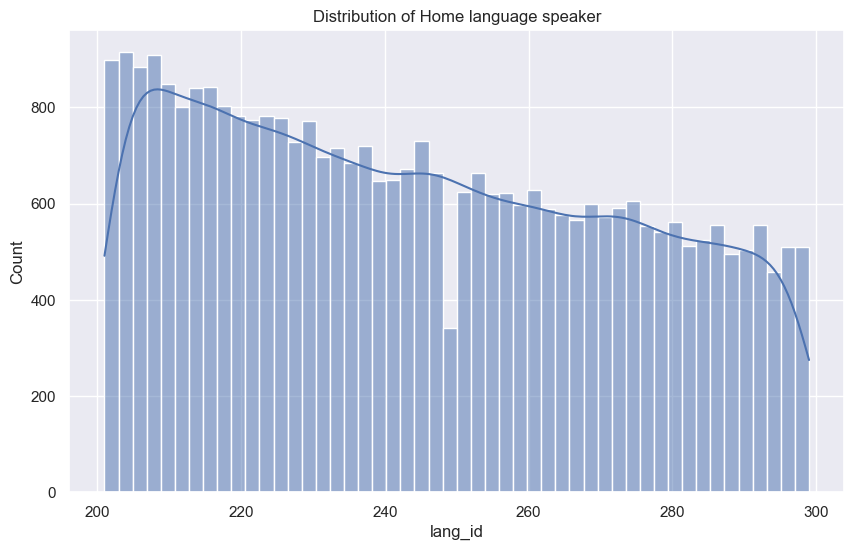

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['lang_id'], bins=50, kde=True)
plt.title('Distribution of Home language speaker')
plt.xlabel('lang_id')
plt.show()

In [75]:
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [76]:
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]